## Load Stuff

In [1]:
import torch
from mario_gpt.dataset import MarioDataset
from mario_gpt.prompter import Prompter
from mario_gpt.lm import MarioLM
from mario_gpt.utils import view_level, convert_level_to_png

### Load Model

In [2]:
mario_lm = MarioLM()

Using shyamsn97/Mario-GPT2-700-context-length model


/home/kokkgoblin/miniconda3/envs/py39/lib/python3.9/site-packages/transformers/models/auto/modeling_auto.py:1177: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Using shyamsn97/Mario-GPT2-700-context-length tokenizer


In [3]:
TILE_DIR = "../data/tiles"

### Load Dataset (Optional)

In [4]:
dataset = MarioDataset(mario_lm.tokenizer)

No level string specified, using default string FULL_LEVEL_STR_WITH_PATHS...





Token indices sequence length is longer than the specified maximum sequence length for this model (102116 > 1024). Running this sequence through the model will result in indexing errors


#### View string representation of level

In [5]:
view_level(dataset.input_ids[:700], mario_lm.tokenizer)

['--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '-------------------------------------------------o',
 '--------XSSSSS---------------------------------SSS',
 '--------X-----------------------------------------',
 '--------X-----------------------------------------',
 '-------EX--E-X---------------xxxx-?-----------xxxx',
 '--------XSS?SX---QQ?QQ------xx<>-x-----------xx--?',
 '---------------------------xx-[]--x---------xx----',
 '--------------------------xx--[]---x-------xx-----',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxx---[]----xxxxxxxx------',
 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---XXX']

#### Image

##### Previewing the first 50 columns of the dataset

/home/kokkgoblin/miniconda3/envs/py39/lib/python3.9/site-packages/Pillow-9.1.1-py3.9-linux-x86_64.egg/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


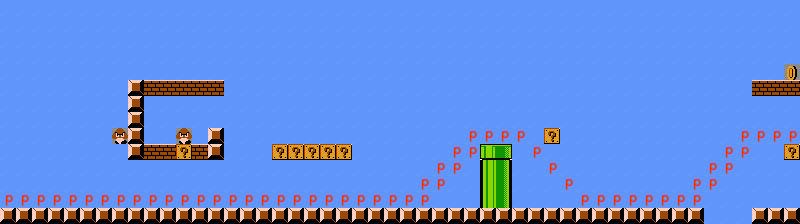

In [6]:
img = convert_level_to_png(dataset.input_ids[:700], TILE_DIR, mario_lm.tokenizer)[0]
img

#### Set device

In [7]:
device = torch.device('cuda')
mario_lm = mario_lm.to(device)

## Generating Levels

In [45]:
prompts = ["many pipes, many enemies, some blocks, high elevation"]

##### We generate 1399 predictions for an even 1400 output (including the input seed which is just a single block). Mario Levels have height of 14, so we generate 100 columns.

In [46]:
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=1399,
    temperature=2.0,
    use_tqdm=True
)

shape: torch.Size([1, 685]), torch.Size([1, 1400]) first: 


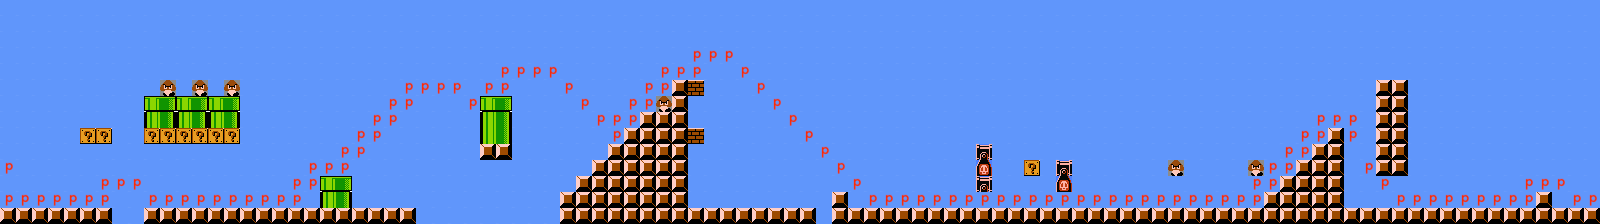

In [47]:
img = convert_level_to_png(generated_level.squeeze(), TILE_DIR, mario_lm.tokenizer)[0]
img

#### Check if the model generated the correct level
##### Because of the stochastic nature of the model and the small training dataset, the model may generate levels that do not completely match the given prompt

In [50]:
mario_lm.prompter(generated_level)[0]

'some pipes, many enemies, some blocks, high elevation'